### Quarto Desafio da 3º Imerssão de Dados Alura

Para esse desafio estou utilizando o dataset *dados_experimentos.zip* disponbilizado durante a imersão de dados. O dataset contém dados de experimentos biogenéticos que foi proposto pela [Vanessa Leiko](https://www.linkedin.com/in/vanessa-leiko-oikawa-cardoso/) como material de apoio para essa imersão.

Cada linha deste dataset contém os experimentos realizados, onde pode ser observado na coluna **Tratamento** que alguns dos experimentos houve a exposição a droga e por determinado tempo conforme descreve a coluna **tempo**.

Durante o experimentos houve diferentes dosagens e utilizado várias amostras de drogas conforme nota-se na coluna **composto**.

Cada linha representa uma cultura de célula que foi exposta ao experimento, sendo submetido há algum tipo de droga para tal dosagem.

No dataset **dados_resultados.csv** contém o resultado dos experímentos realizados.

Criado por Leniel dos Santos
Adicione no [linkedin](https://www.linkedin.com/in/leniel-dos-santos-7813a924/)

In [1]:
# carregar as bibliotecas de sempre
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Vamos carregar o dadaset de experimentos
dados_experimentos = pd.read_csv('dados_experimentos.zip', compression='zip')
dados_resultados = pd.read_csv('dados_resultados.csv')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Repare que ele já mostra pra gente o número de colunas: 877. Ou seja, é um dataset bem extenso.

Vamos começar a analisar as colunas. A primeria coluna tem o nome de "id", o que nos remete a um identificador. Além disso, as seguintes colunas possuem nomes bem complexos. Não são nomes muito descritivos para quem não é da área.

Com a ajuda da Vanessa, descobrimos que esses nomes remetem aos mecanismos de ação das drogas. Ou seja, esses dados nos trazem a relação do mecanismo de ação do alvo (enzima, proteína, etc) com a droga utilizada. Ela também explicou sobre os termos "agonista" e "antiagonista", que ativam o receptor e o bloqueiam, respectivamente.

Nesse ponto a Vanessa nos explica numa apresentação como funciona a ligação do spike com o receptor e todo o procedimento de infecção nas nossas células.

Agora já sabemos que cada coluna do nosso dataframe representa um mecanismo de ação. Olhando para nosso cabeçalho percebemos que temos praticamente todos os dados com o valor 0. Será que todos os dados da tabela tem esse valor? Vamos investigar!

In [3]:
dados_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1], dtype=int64)

Olha só! Nosso resultado foi um array entre 0 e 1. Se você quiser fazer um teste com todos os outros mecanismos de ação também encontrará o resultado entre 0 e 1. Mas por que isso acontece?

Cada linha é o resultado do experimento da outra base de dados dos experimentos que trabalhamos. Quando um determinado mecanismo de ação é ativado ele é indicado como 1. Quando esse mecanismo de ação não é ativado ele é detectado como 0.

Portanto, todo resultado que obtivermos o número 1, saberemos que ele foi ativado.

Vamos fazer uma investigação agora que pode ser muito interessante para o cientista que está trabalhando nesse projeto: qual foi o mecanismo de ação que foi mais ativado?

Vamos então fazer a soma das colunas, para saber qual vai ser o que apresenta mais o número 1. Mas antes vamos verificar se todas as minhas colunas possuem somente números ou se possuem strings também nelas, através desse código:

In [4]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


Vimos que uma delas apresenta como resultado 1 objeto. Ou seja, não conseguiremos aplicar a função soma de forma direta.

Vamos então fazer essa soma excluindo a coluna id, que possui dados diferentes de números em sua composição, da seguinte maneira:

In [5]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Legal. No resultado há uma informação que nos chama a atenção: os inibidores, no topo do nosso resultado, são os que possuem maior quantidade de resultados positivos. Seria um ponto a se investigar.

Então aqui vamos ter o nosso primeiro desafio da aula 4. Lembrando que todos os desafios estão no final desse notebook da aula.


Nós fizemos uma contagem para saber onde o mecanismo de ação obteve mais respostas; agora vamos fazer outros testes.

Vamos verificar se a linha específica que vamos escolher foi ativada em algum momento. E, se ela foi ativada, quantas vezes isso ocorreu?

Utilizaremos o seguinte código:

In [6]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

E aqui temos o nosso resultado. Na primeira linha tivemos uma única ativação. Já na segunda não obtivemos nenhuma. Na terceira tivemos 3, e assim por diante. Nesse que tivemos a resposta como 0, precisaríamos saber se foi um controle, ou se realmente a droga não ativou nenhuma resposta.

Aqui embaixo temos os nossos dados dos resultados:

In [7]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


E aqui temos a nossa base de dados:

In [8]:
dados_experimentos.rename(columns={'droga': 'composto'}, inplace=True)
dados_experimentos.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Na base de dados resultados não temos a informação que queremos, referente ao tratamento. Nós só temos a coluna tratamento na base de dados inteira.

No tratamento só temos a coluna id, e os mecanismos de ação que foram ativados por aquela coluna. Então, agora, precisamos de alguma maneira, mesclar essas informações.

Antes de fazer esse passo, de mesclar, vamos criar duas novas colunas na base de dados resultado. Vamos criar uma primeira coluna que vamos chamar de n_moa(número de moas ativos), que é justamente o que havíamos calculado anteriormente, dessa maneira:

In [9]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

Vamos então verificar se a coluna apresenta resultados diferentes de 0; se for diferente de 0 ela retorna a mensagem 'true'; se for igual a 0 retorna 'false':

In [10]:
dados_resultados['n_moa'] != 0

0         True
1        False
2         True
3        False
4         True
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: n_moa, Length: 23814, dtype: bool

Ok, então o código para criarmos e visualizarmos as duas colunas é esse:

In [11]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


Para visualizarmos basta ir até as duas últimas colunas que elas estarão lá.

Agora que temos as duas colunas que queremos, vamos mesclar, ou então "mergear", as informações que queremos.

Para isso vamos utilizar o merge do pandas, através desse código:

In [12]:
dados_combinados = pd.merge(dados_experimentos, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Maravilha! Conseguimos agora a junção dos nossos dados de resultados com os dados de experimentos. Agora conseguimos responder a pergunta que fizemos anteriormente. No tratamento eu ativei algum moa?

Para fazer isso vamos utilizar o método:

In [13]:
dados_combinados.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

E obtivemos todas as respostas com o 'false'. Isso quer dizer que com controle não tivemos nenhuma resposta de algum mecanismo de ação.

Agora, será que algum tratamento que o paciente recebeu (com_droga, nesse caso) teve alguma substância que não ativou o mecanismo de ação? Vamos responder isso com a seguinte alteração no código anterior:

In [14]:
dados_combinados.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

Olha só, tivemos um resultado interessante. Vemos que 14447 tiveram mecanismos de ação, e aproximadamente 7500 não foram ativados.

Vamos fazer uma análise utilizando agora o boxplot, que gera uma imagem onde podemos identificar a mediana(linha central) e os quartis, entendendo assim como está a distribuição dos dados; dessa maneira vamos identificar, de forma visual, a comparação de categoria dos dados. Para isso vamos utilizar os seguintes códigos:

<AxesSubplot:xlabel='composto', ylabel='g-0'>

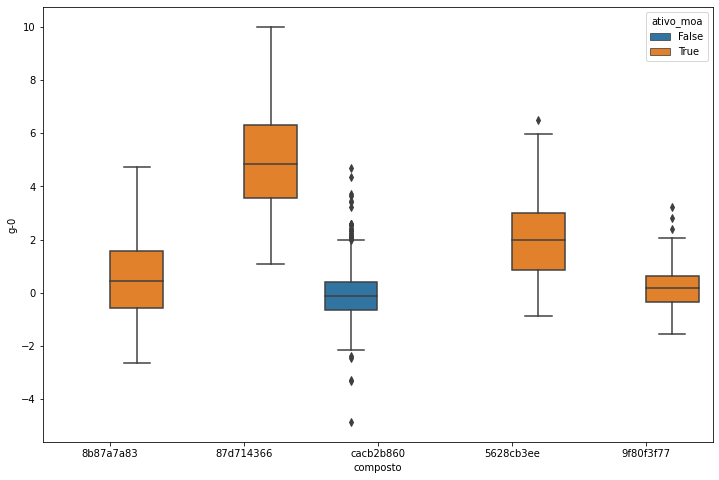

In [15]:
composto_principal = dados_combinados['composto'].value_counts().index[:5]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal'), y= 'g-0', x='composto', hue='ativo_moa')

Analisando os boxplots, percebemos que temos algumas categorias com a mediana próxima de 0; temos outra com a mediana próxima de 5 e a outra próxima de 2.

É curioso observarmos também que o 3º boxplot, da esquerda para a direita, está bem concentrado; esse composto específico é na verdade o composto que nos indica que foi "com tratamento".

Outro ponto interessante é que o último boxplot tem um comportamento muito semelhante ao 3º; provavelmente a droga não modificou tanto assim o gene 0.

### Desafio 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)



Antes de começar a trabalhar com os dados do dataset vou fazer uma cópia do dataset resultados para não perder os dados padrões do dataset principal.

Como precisamos separar os MOAS *inhibitor* e *antagonist* vou criar uma lista com esses dois elementos e fatias o nome da cada feature obtendo o último elemento do fatiamento, a partir deste fatiamento caso o elemento seja inhibitor populamos nossa lista para inhibitor, caso o elemento seja antagonist populamos nossa lista para antagonist.

A partir das duas listas *(colunas_inhinibitor e colunas_antagonist)* obtemos o dataset para plotar o gráfico dos dez maiores MOAS. 


In [56]:
lista_colunas = dados_resultados.columns.to_list()

index = ['inhibitor','antagonist']
colunas_inhibitor = list()
colunas_antagonist = list()

for coluna in lista_colunas:
    if coluna.split('_')[-1] in index:
        if index.index(coluna.split('_')[-1]) > 0:
            colunas_antagonist.append(coluna)
        else:
            colunas_inhibitor.append(coluna)
        
dados_grafico_inhibitor = dados_resultados[colunas_inhibitor].sum().sort_values(ascending=False)[:11]
dados_grafico_antagonist = dados_resultados[colunas_antagonist].sum().sort_values(ascending=False)[:11]

print(dados_grafico_inhibitor)

nfkb_inhibitor              832
proteasome_inhibitor        726
cyclooxygenase_inhibitor    435
dna_inhibitor               402
cdk_inhibitor               340
egfr_inhibitor              336
tubulin_inhibitor           316
pdgfr_inhibitor             297
hmgcr_inhibitor             283
flt3_inhibitor              279
kit_inhibitor               273
dtype: int64


Com nossas listas criadas vamos plotar em um gráfico de barra os dez maiores MOAS.

Antes vou criar uma função apenas para padronizar o nome dos labels no eixo **X**.

In [184]:
def rename_label(names):
    return [name.split('_')[0] for name in names]

Dez maiores MOAS antagonist

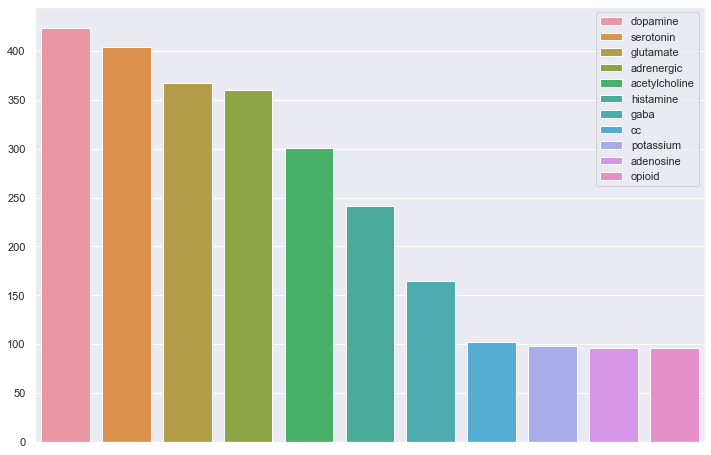

In [187]:
sns.set()
plt.figure(figsize=(12,8))

ax = sns.barplot(x=dados_grafico_antagonist.index, 
                    y=dados_grafico_antagonist.values, 
                    hue=rename_label(dados_grafico_antagonist.index), 
                    dodge=False)

ax.set_xticklabels([])
plt.show()

Dez maiores MOAS inhibitor

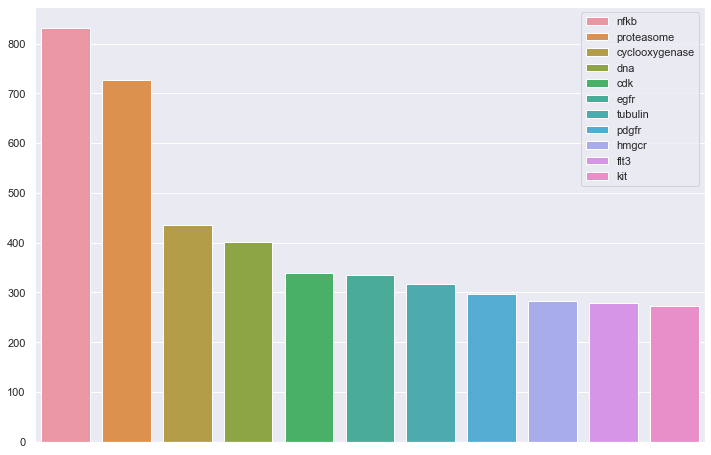

In [188]:
plt.figure(figsize=(12,8))

ax = sns.barplot(x=dados_grafico_inhibitor.index, 
                    y=dados_grafico_inhibitor.values, 
                    hue=rename_label(dados_grafico_inhibitor.index), 
                    dodge=False)

ax.set_xticklabels([])
plt.show()

### Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle



Vamos visualizar quais as informações que temos na feature **tratamento**

In [65]:
dados_combinados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

Sabendo que na feature **tratamento** temos dois valores do tipo string, sendo eles com_droga e com_controle. Vamos montar um dicionário com esses index e atribuir ao index o valor para qual queremos substituir.

In [66]:
labels = {'com_droga': 0, 'com_controle': 1 }
dados_combinados['eh_tratamento'] = dados_combinados['tratamento'].map(labels)

dados_combinados['eh_tratamento'].unique()

array([0, 1], dtype=int64)

A partir da função **map** do pandas vamos fazer o mapeamento de cada linha substituindo com_droga por 0 e com_controle por 1. 

Dê uma conferida na documentação do pandas para saber mais sobre a função [map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html?highlight=map#pandas.Series.map)


### Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72



In [ ]:
Antes de fazer essa separação criando novas features, setar 0 para falso e 1 para aquela verdadeira. Vou criar guardar os dados originais da feature **tempo** porque depois vamos regrar ela e manter na formato orignal dentro da população.


In [23]:
tempo = dados_combinados['tempo']  
dados_combinados = pd.get_dummies(dados_combinados, columns=['tempo'])
dados_combinados['tempo'] = tempo

Para fazer a separação da feature **tempo** em três novas features vamos usar a função get_dummies() do pandas. A função converte os dados como categóricos.

Dê uma olhada na documentação do pandas para saber mais sobre a função [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies)


Visualizando as cinco primeiras colunas criadas a partir da função get_dummies().

Olha que interessante, tínhamos três valores na feature tempo *(24, 48 e 72)*, note que o pandas criou a coluna tempo_24 e marcou com 1 para aqueles genes que ficaram expostos 24 ao experimentos, assim consecutivamente.

Não estamos trabalhando com Machine Larning ainda, mas geralmente precisamos fazer o *one-hot-encoding* quando vamos empregar alguns modelos.


In [28]:
dados_combinados[['tempo_24','tempo_48','tempo_72']].head()

,tempo_24,tempo_48,tempo_72
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


### Desafio 04: Estudar sobre combinações de DF [https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)



A função concat do pandas é muito interssante e para quem trabalha com banco de dados relacional, acostumado fazer cruzamentos de dados entre tabelas usando inner join, right ou left join, vai ficar muito familiarizado com essa função.



Um data frame é uma tabela de dados não é mesmo? Sendo uma tabela de dados podemos fazer relacionamento entre data frames utilizando uma feature em comum semelhante a chave primakey de uma tabela em um banco de dados relacional.

Poderia copiar e replicar os mesmos exemplos da documentação do pandas, mas não vou fazer isso. Pelo contrário, vou deixar o link aqui para você entrar na documentação e saber um pouco mais.

Se tiver duvidas pode deixar um comentário no repositório do Github ou me mandar uma mensagem no [linkedin](https://www.linkedin.com/in/leniel-dos-santos-7813a924/).

Não esqueça de deixar seu fallow e me adicionar no linkedin :stuck_out_tongue_winking_eye:

### Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)



In [148]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_tratamento
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0


In [157]:
dados_composto_cac = dados_combinados.iloc[dados_combinados.query('eh_tratamento == 0')['n_moa'].sort_values(ascending=False)[:11].index,:]



#pd.Series(dados_composto_cac)

#dados_composto_cac = dados_combinados.query('composto == "7cbed3131"')
#dados_composto_cac[['composto','tratamento','tempo','dose','n_moa']].value_counts()
#tempo_48 tempo_72

In [158]:
dados_composto_cac

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_tratamento
4849,id_344ef5019,com_droga,72,D1,91dc8bab8,7.5800,0.6334,2.5020,0.2503,5.6550,...,-10.0000,-10.0000,-10.0000,-10.0000,-8.2980,-10.000,-9.9040,7,True,0
17645,id_bd978e25d,com_droga,48,D1,91dc8bab8,7.0100,-1.0990,3.1850,0.4206,4.1150,...,-9.9530,-9.9530,-9.9150,-9.9530,-9.7940,-9.953,-8.8830,7,True,0
19186,id_cddde768c,com_droga,24,D2,91dc8bab8,5.6080,0.6003,1.1950,-2.9100,1.6820,...,-7.2520,-7.9460,-2.3580,0.5068,-3.8600,-4.470,-1.8210,7,True,0
14316,id_9a2203dad,com_droga,72,D2,91dc8bab8,7.6180,0.7363,4.3180,-0.7566,3.8710,...,-10.0000,-10.0000,-9.6010,-9.7380,-6.6870,-9.949,-6.9430,7,True,0
21197,id_e3626b4d9,com_droga,48,D2,91dc8bab8,6.9910,3.3710,-0.1335,-0.0499,-0.5660,...,-9.3240,-10.0000,-10.0000,-5.7250,-3.4910,-7.686,-5.2890,7,True,0
20584,id_dceb9fdf8,com_droga,24,D1,91dc8bab8,7.1010,-0.6710,0.9858,-0.0294,2.9990,...,-10.0000,-10.0000,-5.8580,-10.0000,-7.9630,-8.504,-4.5050,7,True,0
13030,id_8c4b726ff,com_droga,24,D2,3f9dd627f,-0.2646,-1.3810,0.8893,1.8510,-0.6121,...,0.0754,0.6973,0.1197,-0.1947,0.1494,-1.985,-1.6220,5,True,0
6687,id_4784798f7,com_droga,72,D1,228f08c3d,0.2655,-1.5710,0.4259,0.0974,-0.3962,...,-0.0080,0.4965,-0.2138,0.5805,0.7802,-3.420,-0.4485,5,True,0
8117,id_57031c738,com_droga,48,D1,809527b9d,1.2050,-0.0748,1.3230,0.8678,1.0930,...,-0.3118,-0.0322,0.3695,-0.9324,0.0189,-3.826,0.0877,5,True,0
16957,id_b6815e75f,com_droga,48,D1,228f08c3d,-0.4554,-0.0785,-0.2857,0.8607,-0.3685,...,0.3662,-0.4106,0.2918,-0.3784,-0.0994,-2.832,-1.2610,5,True,0


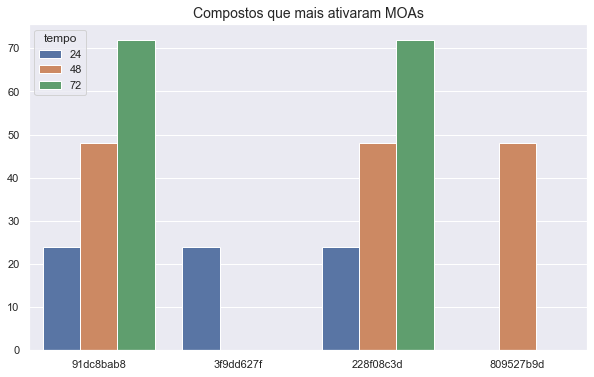

In [224]:
plt.figure(figsize=(10,6))
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12)

ax = sns.barplot(y='tempo', x='composto', hue='tempo', data=dados_composto_cac)

ax.set_title('Compostos que mais ativaram MOAs')
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

### Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA



In [262]:
compostos_nr = dados_combinados['composto'].value_counts()
compostos_nr

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
98a2c9b21       1
d75904698       1
89ced6383       1
91a585117       1
861a693e3       1
Name: composto, Length: 3289, dtype: int64

In [268]:
moa_dados = dados_combinados.query('composto == "98a2c9b21"')
moa_dados['ativo_moa'].unique()

array([ True])

In [ ]:
Em minha análise me parece que todos os experimentos com droga tiveram ao menos um MOA ativado. Alguns dos compostos ativaram mais de um MOA.

### Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes



In [227]:
dados_resultados.head()


,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


### Desafio 08: Resumo do que você aprendeu com os dados

A cada dia mergulhando nos dados deste data frame aprendemos mais sobre a ciência biológica.

Podemos notar que alguns compostos utilizados neste experimentos apresentam ótimos resultados independente do tempo de exposição.

Claro, essa é uma análise superficial olhando apenas para os dados deste data frame, quem realmente pode afirmar se isso pe com ou ruim seria a área de negócio, no nosso exemplo um especialista neste assunto e conhecedor dos dados deste experimentos.

É possível notar que alguns genomas ao ficaram exposto a um determinado compostos por 24h ativaram cinco MOAs, enquanto alguns dos compostos não tiveram resultados tão satisfatório.


Estou gostando deste tema, acho que no final dessa imersão vou pegar um dia para me aprofundar um pouco mais nos dados e em pesquisas para fazer EDA mais completa.

**Obrigado Alura por esse aprendizado!!!**